In [77]:
import pandas as pd
import numpy as np

In [78]:
main_file_path = r"../data/raw/nyra_2019_complete.parquet"
horse_global_ids = r"../data/raw/horse_ids.csv"
horse_names = r"../data/raw/horse_names.csv"

df = pd.read_parquet(main_file_path)

df_horse_ids = pd.read_csv(horse_global_ids, 
                           header=0,
                           index_col=0)
                           
df_horse_names = pd.read_csv(horse_names,
                             header=0,
                             index_col=0)

df.columns = ['track_id','race_date','race_number','program_number','trakus_index','latitude','longitude','distance_id','course_type','track_condition','run_up_distance','race_type','purse','post_time','weight_carried','jockey','odds','position_at_finish']

df["program_number"] = df["program_number"].apply(lambda x: str(x).rstrip())

df["horse_pk"] = df.apply(lambda x: f"{x["track_id"]}_{x["race_date"]}_{x["race_number"]}_{x["program_number"]}", axis=1)

df["win"] = np.where(df["position_at_finish"] == 1, 1, 0)

df["rid"] = df.apply(lambda x: f"{x["track_id"]}_{x["race_date"]}_{x["race_number"]}", axis=1)

df_horse_ids["horse_pk"] = df_horse_ids.apply(lambda x: f"{x["track_id"]}_{x["race_date"]}_{x["race"]}_{x["program_number"]}", axis=1)

df_horse_ids["horse_id"] = df_horse_ids["horse_id"].astype(str).str.rstrip()

df = df.merge(df_horse_ids[["horse_pk", "horse_id"]], on="horse_pk", how="left")

df_horse_names["horse_id"] = df_horse_names["horse_id"].astype(str).str.rstrip()

df = df.merge(df_horse_names[["horse_id","horse_name"]], on="horse_id", how="left")



In [79]:
df

# Track Type -> M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf.

# Track Condition -> YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft.

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,post_time,weight_carried,jockey,odds,position_at_finish,horse_pk,win,rid,horse_id,horse_name
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228424,AQU,2019-11-23,9,2,167,40.672363,-73.830853,1100,T,GD,...,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR)
5228425,AQU,2019-11-23,9,2,168,40.672321,-73.830873,1100,T,GD,...,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR)
5228426,AQU,2019-11-23,9,2,169,40.672281,-73.830893,1100,T,GD,...,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR)
5228427,AQU,2019-11-23,9,2,170,40.672240,-73.830913,1100,T,GD,...,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR)


In [80]:
df['track_id'].unique()

array(['AQU', 'BEL', 'SAR'], dtype=object)

In [81]:
aqu = df[df['track_id']=='AQU']
bel = df[df['track_id']=='BEL']
sar = df[df['track_id']=='SAR']

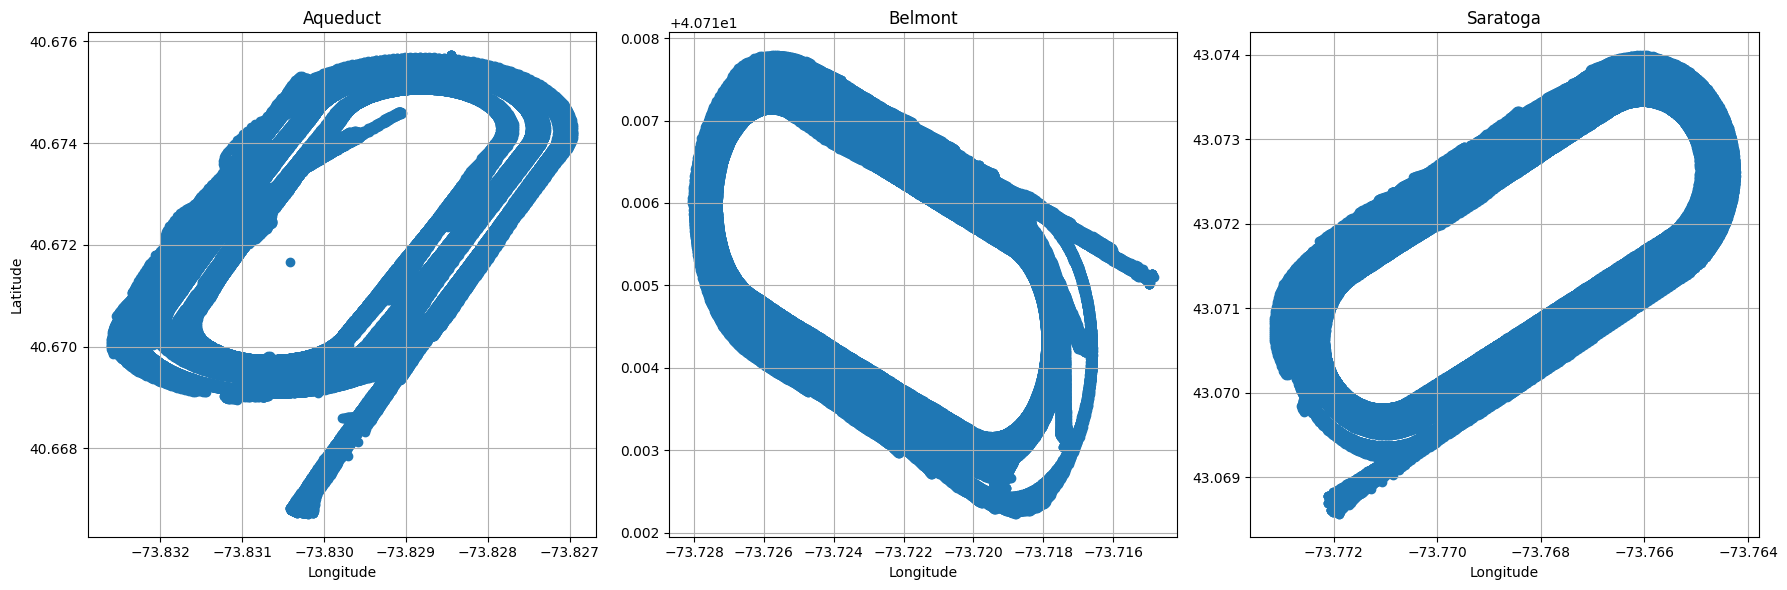

In [82]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# AQU
axes[0].scatter(aqu['longitude'], aqu['latitude'], marker='o')
axes[0].set_title('Aqueduct')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True)

# BEL
axes[1].scatter(bel['longitude'], bel['latitude'], marker='o')
axes[1].set_title('Belmont')
axes[1].set_xlabel('Longitude')
axes[1].grid(True)

# SAR
axes[2].scatter(sar['longitude'], sar['latitude'], marker='o')
axes[2].set_title('Saratoga')
axes[2].set_xlabel('Longitude')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [83]:
sar['distance_id'].unique()

array([ 550,  600,  900, 1650, 1900,  700,  800,  850,  650,  950, 1100,
       1200, 1000, 1400])

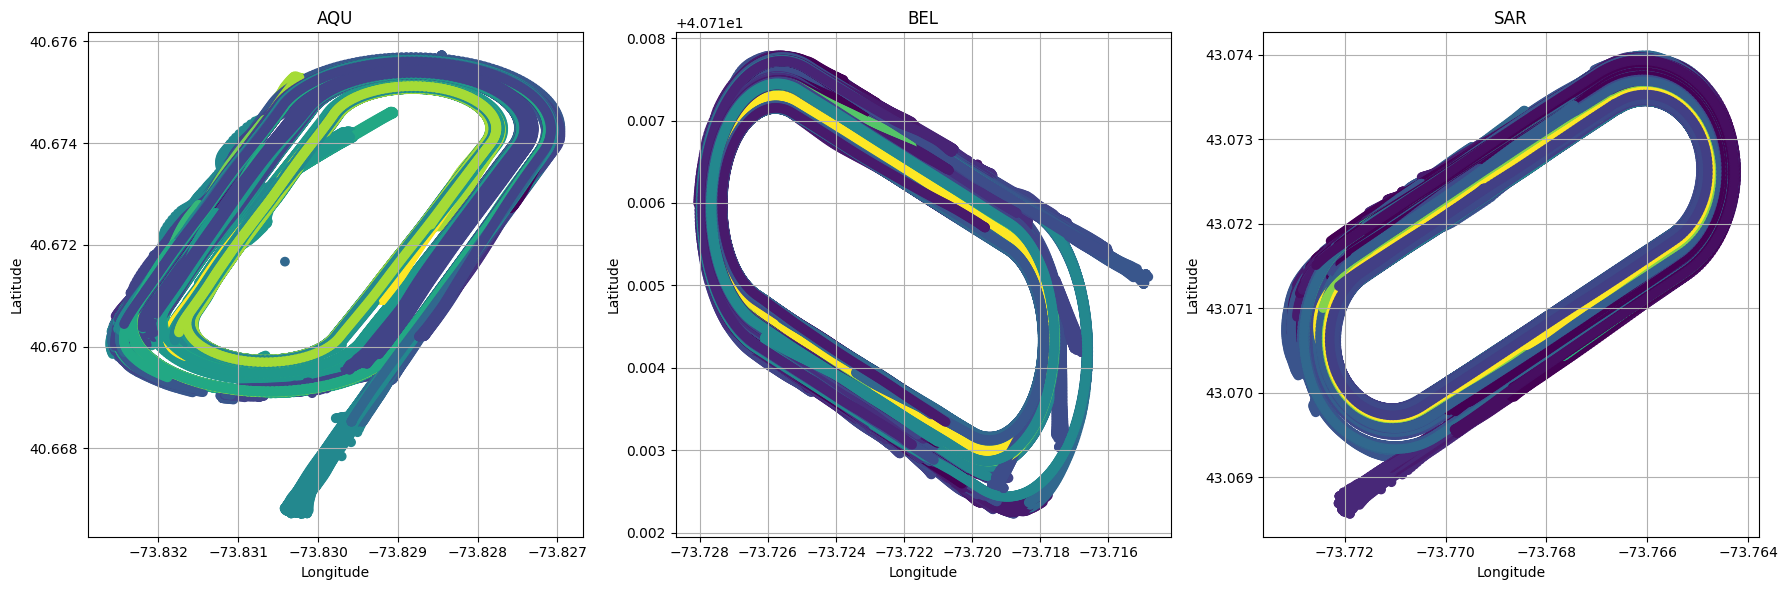

In [84]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# AQU
sc0 = axes[0].scatter(
    aqu['longitude'], aqu['latitude'],
    c=aqu['distance_id'], cmap='viridis', marker='o'
)
axes[0].set_title('AQU')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True)

# BEL
sc1 = axes[1].scatter(
    bel['longitude'], bel['latitude'],
    c=bel['distance_id'], cmap='viridis', marker='o'
)
axes[1].set_title('BEL')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True)

# SAR
sc2 = axes[2].scatter(
    sar['longitude'], sar['latitude'],
    c=sar['distance_id'], cmap='viridis', marker='o'
)
axes[2].set_title('SAR')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')
axes[2].grid(True)


plt.tight_layout()
plt.show()

In [85]:
aqu.columns

Index(['track_id', 'race_date', 'race_number', 'program_number',
       'trakus_index', 'latitude', 'longitude', 'distance_id', 'course_type',
       'track_condition', 'run_up_distance', 'race_type', 'purse', 'post_time',
       'weight_carried', 'jockey', 'odds', 'position_at_finish', 'horse_pk',
       'win', 'rid', 'horse_id', 'horse_name'],
      dtype='object')

In [86]:
aqu.groupby(['distance_id','course_type'])['rid'].nunique()

distance_id  course_type
450          D                2
550          D               28
600          D              219
             O               52
650          D               97
700          D               83
800          D              222
             O                1
             T               17
850          O               11
             T               35
900          D               46
             O                3
             T                1
950          D                1
1050         D                1
1100         D                1
             T                4
1200         T                1
Name: rid, dtype: int64

In [87]:
sar.groupby(['distance_id','course_type'])['rid'].nunique()

distance_id  course_type
550          D              34
             T              60
600          D              53
650          D              22
700          D              62
800          I              36
850          I              29
             T              18
900          D              49
             I               6
             T               4
950          D               1
             T               8
1000         D               3
1100         I               8
1200         I               2
1400         D               1
1650         M               5
1900         M               2
Name: rid, dtype: int64

In [88]:
bel.groupby(['distance_id','course_type'])['rid'].nunique()

distance_id  course_type
500          D               15
             T                3
550          D                9
600          D              129
             I               62
             T               30
650          D               77
700          D               50
             T               47
800          D               65
             T               61
850          D               68
             I               60
             T               28
900          D                6
             I               23
1000         D                3
             I               18
1100         D                1
             I                5
             T                2
1200         D                3
             T                4
1600         T                1
1800         M                1
2000         M                1
Name: rid, dtype: int64

In [89]:
df['seconds'] = df['trakus_index'] * 0.25

In [90]:
# Conversion function
def interpret_time(value):
    value_str = str(value)
    if len(value_str) == 3:
        hour = int(value_str[0])
        minute = int(value_str[1:])
        return f"{hour}:{minute:02d} PM"
    elif len(value_str) == 4:
        hour = int(value_str[:2])
        minute = int(value_str[2:])
        if 1100 <= value <= 1159:
            return f"{hour}:{minute:02d} AM"
        elif 1200 <= value <= 1259:
            return f"{hour - 12}:{minute:02d} PM" if hour == 12 else f"{hour}:{minute:02d} PM"
        else:
            return f"{hour}:{minute:02d}"  # fallback, should not hit this
    else:
        return "Invalid"

# Apply to create new column
df['parsed_time'] = df['post_time'].apply(interpret_time)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,jockey,odds,position_at_finish,horse_pk,win,rid,horse_id,horse_name,seconds,parsed_time
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde,18.25,4:20 PM
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,...,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde,18.50,4:20 PM
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,...,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde,15.75,4:20 PM
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,...,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde,16.00,4:20 PM
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,...,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9_6,0,AQU_2019-01-01_9,60,Crafty Concorde,16.25,4:20 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228424,AQU,2019-11-23,9,2,167,40.672363,-73.830853,1100,T,GD,...,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR),41.75,3:53 PM
5228425,AQU,2019-11-23,9,2,168,40.672321,-73.830873,1100,T,GD,...,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR),42.00,3:53 PM
5228426,AQU,2019-11-23,9,2,169,40.672281,-73.830893,1100,T,GD,...,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR),42.25,3:53 PM
5228427,AQU,2019-11-23,9,2,170,40.672240,-73.830913,1100,T,GD,...,Joel Rosario,1120,9,AQU_2019-11-23_9_2,0,AQU_2019-11-23_9,2425,Petit Fils (FR),42.50,3:53 PM


In [97]:
df.sample(10)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,odds,position_at_finish,horse_pk,win,rid,horse_id,horse_name,seconds,parsed_time,timestamp
1835121,SAR,2019-08-15,5,10,196,43.073884,-73.765686,700,D,FT,...,2200,9,SAR_2019-08-15_5_10,0,SAR_2019-08-15_5,1735,Cavaradossi,49.00,3:12 PM,2019-08-15 15:12:49.000
4861387,BEL,2019-09-08,7,6,293,40.714051,-73.725549,800,D,FT,...,350,4,BEL_2019-09-08_7_6,0,BEL_2019-09-08_7,1610,Maedean,73.25,4:14 PM,2019-09-08 16:15:13.250
3546953,AQU,2019-04-07,6,3,299,40.675334,-73.828864,900,O,FM,...,1580,5,AQU_2019-04-07_6_3,0,AQU_2019-04-07_6,773,Team Win,74.75,4:09 PM,2019-04-07 16:10:14.750
536289,BEL,2019-05-18,7,6,83,40.716189,-73.720445,800,T,GD,...,1090,8,BEL_2019-05-18_7_6,0,BEL_2019-05-18_7,2074,Theaterintheround,20.75,3:10 PM,2019-05-18 15:10:20.750
2341747,AQU,2019-11-30,10,10,205,40.673944,-73.830856,600,D,FT,...,230,2,AQU_2019-11-30_10_10,0,AQU_2019-11-30_10,1861,Elios Milos,51.25,4:14 PM,2019-11-30 16:14:51.250
1170761,SAR,2019-08-10,1,8,347,43.072120,-73.769725,850,I,FM,...,1270,6,SAR_2019-08-10_1_8,0,SAR_2019-08-10_1,871,Big Thicket,86.75,1:00 PM,2019-08-10 13:01:26.750
561254,AQU,2019-04-13,7,5,71,40.669568,-73.829120,800,D,MY,...,530,3,AQU_2019-04-13_7_5,0,AQU_2019-04-13_7,1445,Lady Love,17.75,4:45 PM,2019-04-13 16:45:17.750
1168105,BEL,2019-09-29,7,7,172,40.717717,-73.725147,850,D,FT,...,890,4,BEL_2019-09-29_7_7,0,BEL_2019-09-29_7,1257,Dynamax Prime,43.00,4:11 PM,2019-09-29 16:11:43.000
251629,AQU,2019-11-09,6,4,189,40.672937,-73.828024,850,O,FM,...,2550,5,AQU_2019-11-09_6_4,0,AQU_2019-11-09_6,1879,Aquaphobia,47.25,2:23 PM,2019-11-09 14:23:47.250
4933642,BEL,2019-10-05,2,8,279,40.712911,-73.721371,550,D,FT,...,7425,6,BEL_2019-10-05_2_8,0,BEL_2019-10-05_2,3877,Pacquiao,69.75,0:54 PM,NaT


In [91]:
from datetime import datetime, timedelta

# Ensure correct types
df['race_date'] = pd.to_datetime(df['race_date'])        # e.g. '2024-08-15'  

# Function to build timestamp with decimal seconds
def build_timestamp(row):
    try:
        base_dt = datetime.strptime(
            f"{row['race_date'].date()} {row['parsed_time']}", "%Y-%m-%d %I:%M %p"
        )
        full_dt = base_dt + timedelta(seconds=row['seconds'])
        return full_dt
    except Exception as e:
        return pd.NaT

df['timestamp'] = df.apply(build_timestamp, axis=1)



In [94]:
df.columns

Index(['track_id', 'race_date', 'race_number', 'program_number',
       'trakus_index', 'latitude', 'longitude', 'distance_id', 'course_type',
       'track_condition', 'run_up_distance', 'race_type', 'purse', 'post_time',
       'weight_carried', 'jockey', 'odds', 'position_at_finish', 'horse_pk',
       'win', 'rid', 'horse_id', 'horse_name', 'seconds', 'parsed_time',
       'timestamp'],
      dtype='object')

In [96]:
df[['post_time','timestamp']].sample(20)

,post_time,timestamp
2252844,241,2019-03-23 14:42:26.500
1913114,211,2019-12-07 14:11:53.750
931271,409,2019-04-12 16:09:11.000
1189682,304,2019-01-27 15:05:06.000
1322150,230,2019-12-30 14:30:18.750
168789,336,2019-06-20 15:36:18.750
4150312,511,2019-07-13 17:11:43.750
4275626,1258,NaT
4596896,339,2019-10-12 15:39:09.250
1866528,338,2019-03-08 15:38:55.000
